# Case Study: Analyzing Airplane Crashes And Fatalities using Pandas
##### By `John David`

## `Objective`

##### This case study explores airplane crashes over the years to identify trends, analyze fatalities, and uncover patterns in aviation accidents.

### `Business Questions to Answer:`

##### 1. What are the most common causes of airplane crashes?
##### 2. How have airplane crashes trended over the years?
##### 3. Which airlines have the highest number of crashes?
##### 4. What is the average number of fatalities per crash?
##### 5. What is the deadliest year for aviation accidents?

## Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 2: Load & Inspect the dataset

In [3]:
# Laod dataset
path = 'Airplane_Crashes_and_Fatalities cleaned 1.csv'
df = pd.read_csv(path)

# Display the first 5 rows of the dataset
df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Registration,cn/In,Aboard,Fatalities,Ground
0,0,9/17/1908,5:18:00 pm,Virginia,Military - U.S. Army,NaN,Demonstration,NaN,1,2.0,1.0,0.0
1,1,12/07/1912,6:30:00 am,Jersey,Military - U.S. Navy,NaN,Test flight,NaN,NaN,5.0,5.0,0.0
2,2,06/08/1913,NaN,Canada,Private,-,NaN,NaN,NaN,1.0,1.0,0.0
3,3,09/09/1913,6:30:00 pm,North Sea,Military - German Navy,NaN,NaN,NaN,NaN,20.0,14.0,0.0
4,4,10/17/1913,10:30:00 am,Germany,Military - German Navy,NaN,NaN,NaN,NaN,30.0,30.0,0.0


#### 2.1 Checking the column names & datatypes `df.info()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5227 non-null   int64  
 1   Date          5227 non-null   object 
 2   Time          3043 non-null   object 
 3   Location      5227 non-null   object 
 4   Operator      5227 non-null   object 
 5   Flight #      1067 non-null   object 
 6   Route         3546 non-null   object 
 7   Registration  4906 non-null   object 
 8   cn/In         4023 non-null   object 
 9   Aboard        5206 non-null   float64
 10  Fatalities    5216 non-null   float64
 11  Ground        5206 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 490.2+ KB


#### 2.2 Check for missing values `df.isnull().sum()`

In [5]:
df.isnull().sum()

index              0
Date               0
Time            2184
Location           0
Operator           0
Flight #        4160
Route           1681
Registration     321
cn/In           1204
Aboard            21
Fatalities        11
Ground            21
dtype: int64

<AxesSubplot:>

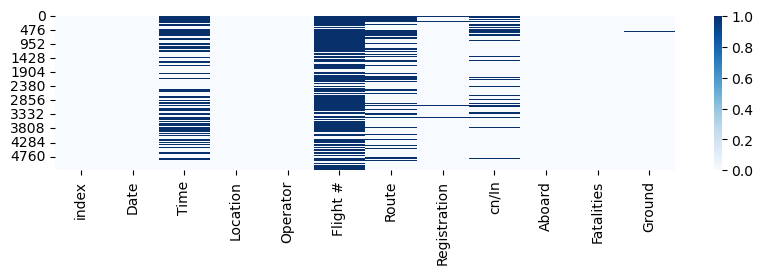

In [9]:
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), cmap='Blues')

## Step 3: Data Cleaning

In [10]:
df.dtypes

index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
dtype: object

In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is null (if any)
df.dropna(subset=['Date'], inplace=True)

In [12]:
df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Registration,cn/In,Aboard,Fatalities,Ground
0,0,1908-09-17,5:18:00 pm,Virginia,Military - U.S. Army,NaN,Demonstration,NaN,1,2.0,1.0,0.0
1,1,1912-12-07,6:30:00 am,Jersey,Military - U.S. Navy,NaN,Test flight,NaN,NaN,5.0,5.0,0.0
2,2,1913-06-08,NaN,Canada,Private,-,NaN,NaN,NaN,1.0,1.0,0.0
3,3,1913-09-09,6:30:00 pm,North Sea,Military - German Navy,NaN,NaN,NaN,NaN,20.0,14.0,0.0
4,4,1913-10-17,10:30:00 am,Germany,Military - German Navy,NaN,NaN,NaN,NaN,30.0,30.0,0.0


In [13]:
df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground'],
      dtype='object')

## Step 4: Analyze trend Over Time

#### 4.1 Number of Crashes Per Year

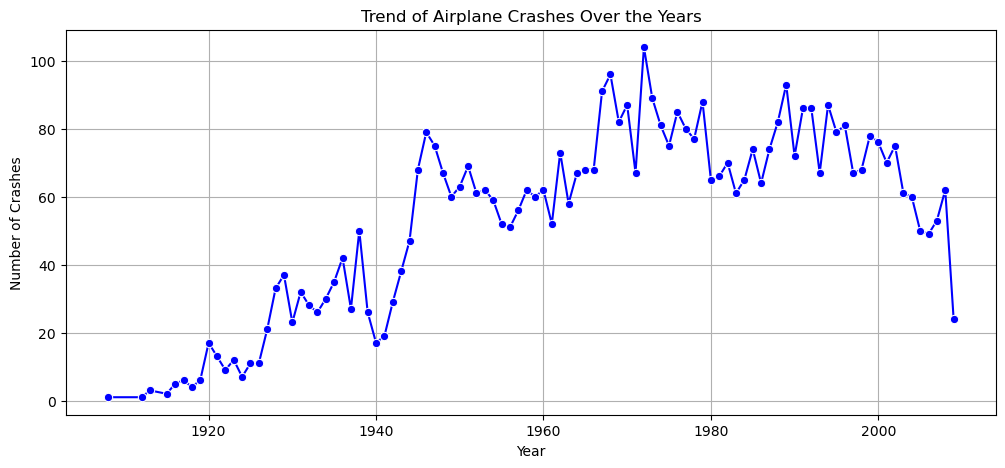

In [24]:
df['year'] = df['Date'].dt.year
crashes_per_year = df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values, color = 'b', marker="o")
plt.title("Trend of Airplane Crashes Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid()
plt.show()

## Step 5: Find the Deadliest Years

#### 5.1 Total Fatalities Per Year

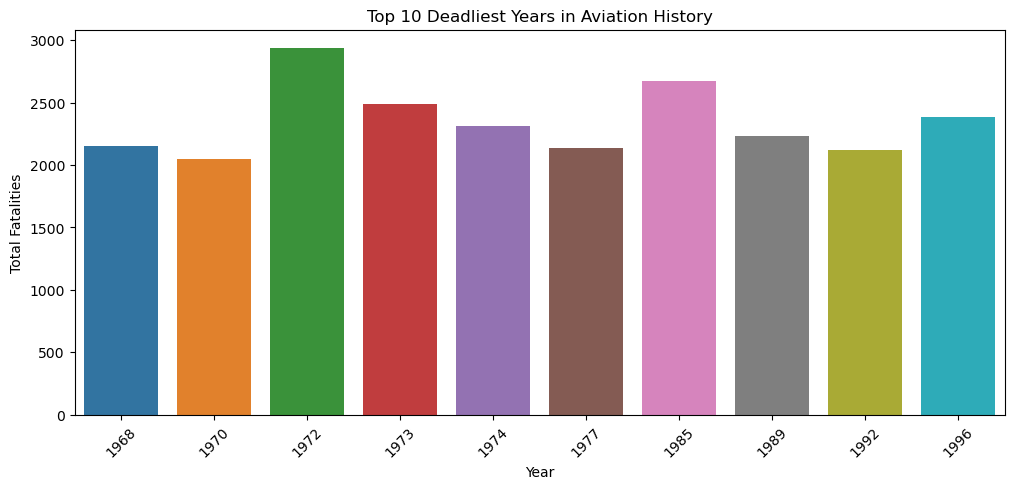

In [29]:
fatalities_per_year = df.groupby('year')['Fatalities'].sum()

# Plot
plt.figure(figsize=(12,5))

sns.barplot(x=fatalities_per_year.nlargest(10).index, 
            y=fatalities_per_year.nlargest(10).values)

plt.title("Top 10 Deadliest Years in Aviation History")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)
plt.show()

## Step 6: Identify the Most Common Airlines Involved in Crashes

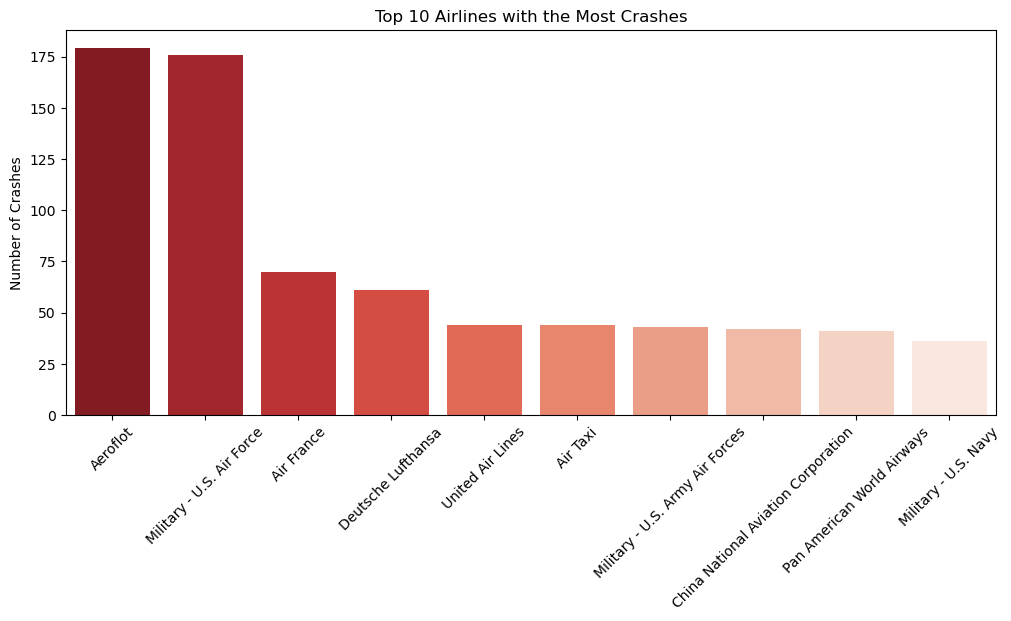

In [27]:
top_airlines = df['Operator'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Airlines with the Most Crashes")
plt.ylabel("Number of Crashes")
plt.show()

## Step 8: Calculate Average Fatalities Per Crash

In [30]:
avg_fatalities = df['Fatalities'].mean()
print(f"Average Fatalities per Crash: {avg_fatalities:.2f}")

Average Fatalities per Crash: 20.16


### Step 9: Key Insights & Findings

##### -- 📌 Trend Analysis: The number of crashes has fluctuated over time, with peak years in specific decades.
##### --📌 Deadliest Years: Some years recorded exceptionally high fatalities, possibly due to major accidents.
##### --📌 Most Affected Airlines: A few airlines have a disproportionately high number of crashes.
##### --📌 Common Causes: Engine failures, weather conditions, and pilot errors appear frequently in crash reports.
##### --📌 Fatality Rates: The average number of fatalities per crash provides insight into accident severity.